#  Practical Implementation of Linear, Ridge and Lasso Regression

### Importing the neccesary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Importing Dataset 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

#### Keys 

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

#### Description of the Boston Dataset 

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Data 

In [7]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


#### Target 

In [8]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

#### Features 

In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Creating a Dataframe 

In [10]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

#### Top 5 data 

In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Target feature is Price 

In [12]:
dataset['Price']=boston.target

In [13]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Checking the null value 

In [15]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Observation

Zero null value

### Correlation with the features of the dataset 

In [16]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Observation

1. RAD and TAX has a strong positive correlation
2. The target column Price is most positively correlated with RM column
3. The target column Price is most negatively correlated with LSTAT column

<AxesSubplot:>

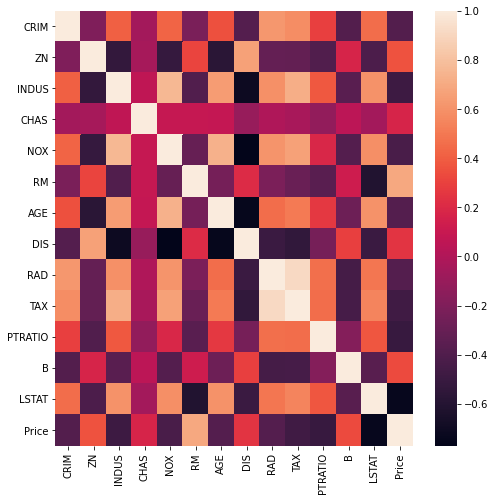

In [17]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr())

### CRIM Vs Price feature 

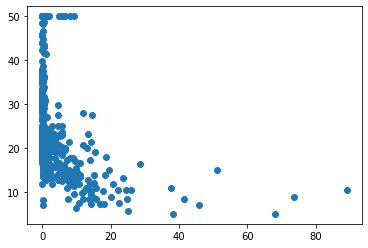

In [18]:
plt.scatter(dataset['CRIM'],dataset['Price'])

### RM Vs Price feature 

<AxesSubplot:xlabel='RM', ylabel='Price'>

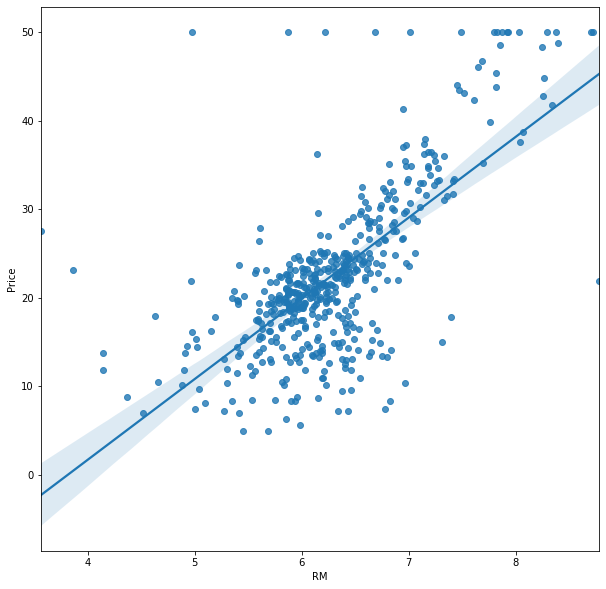

In [19]:
plt.figure(figsize=(10,10))
sns.regplot(x='RM',y='Price',data=dataset)

### Observation
 RM and Price is lineary correlated
 The shaded portion near the best fit line means that the best fit line moves in that portion only
 Where the data are more concentrated, the shaded portion is less
 Where the data are less concentrated, the shaded portion is more

### LSTAT Vs Price feature 

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

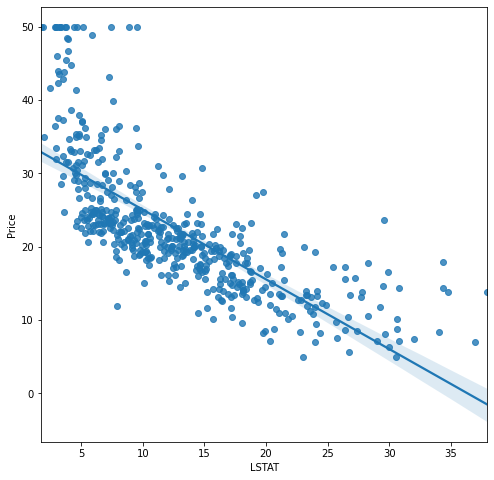

In [20]:
plt.figure(figsize=(8,8))
sns.regplot(x='LSTAT',y='Price',data=dataset)

### Observation

LSTAT and Price feature are linearly correlated

### CRIM Vs Price feature 

<AxesSubplot:xlabel='CRIM', ylabel='Price'>

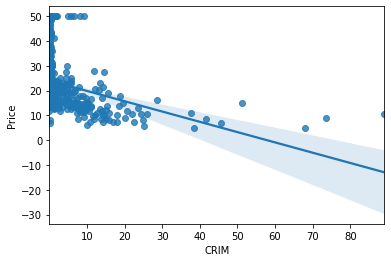

In [21]:
sns.regplot(x='CRIM',y='Price',data=dataset)

### Observation

When the Price is increaing , the CRIME is decreasing

### Checking the  Outliers  in the Price feature

<AxesSubplot:xlabel='Price'>

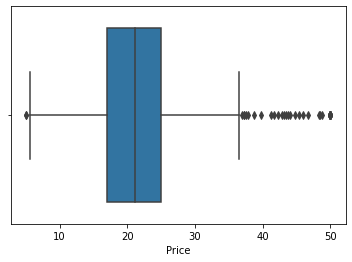

In [22]:
sns.boxplot(dataset['Price'])

### Checking the Outliers in CRIM features 

<AxesSubplot:xlabel='CRIM'>

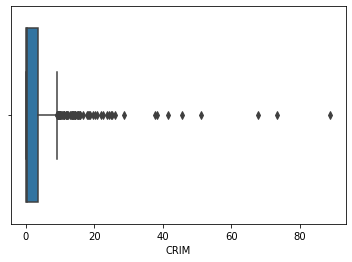

In [23]:
sns.boxplot(dataset['CRIM'])

#### We will not drop the outliers because by doing this there is a chance of lossing important data
#### points and that will effect our prediction

### Creating the Independent and Dependent Features

In [24]:
x=dataset.iloc[:,:-1]  ## Independent Features
y=dataset.iloc[:,-1]   ## Dependent Features

#### Independent Features 

In [25]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Dependent feature 

In [26]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

### Doing Train Test Split on Independent and Dependent Features 

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,random_state=10)

#### Shape of Independent training dataset 

In [28]:
x_train.shape

(339, 13)

#### Shape of Dependent training Dataset 

In [29]:
y_train.shape

(339,)

#### Shape of Inependent testing Dataset  

In [30]:
x_test.shape

(167, 13)

#### Shape of Dependent testing Dataset  

In [31]:
y_test.shape

(167,)

### Dependent Training Dataset 

In [32]:
y_train

147    14.6
330    19.8
388    10.2
238    23.7
113    18.7
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: Price, Length: 339, dtype: float64

### Dependent Testing Dataset 

In [33]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
442    18.4
451    15.2
188    29.8
76     20.0
314    23.8
Name: Price, Length: 167, dtype: float64

### Independent Training Dataset 

In [34]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53
330,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09
388,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62
238,0.08244,30.0,4.93,0.0,0.428,6.481,18.5,6.1899,6.0,300.0,16.6,379.41,6.36
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6.0,432.0,17.8,396.90,17.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


### Independent Testing Dataset 

In [35]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
451,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97


### Standardising or feature scaling of the dataset

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [37]:
scaler

StandardScaler()

###  fit vs fit_transform
#### fit -- For training data when we do fit it means it is going to calculate mean,S.D. of all the 
#### feature separately and transform is going to apply the formula (x-mean)/S.D.
### fit and transform is used for training data and for test data we only do transform 

In [38]:
x_train=scaler.fit_transform(x_train)

In [39]:
x_test=scaler.transform(x_test)

### To avoid datalekage we use transform

In [40]:
x_train

array([[-0.13641471, -0.47928013,  1.16787606, ..., -1.77731527,
         0.39261401,  2.36597873],
       [-0.41777807, -0.47928013, -1.18043314, ..., -0.75987458,
         0.14721899, -0.54115799],
       [ 1.31269177, -0.47928013,  0.95517731, ...,  0.76628645,
         0.19334986,  2.52100705],
       ...,
       [-0.13520965, -0.47928013,  0.95517731, ...,  0.76628645,
         0.17012536,  0.06331026],
       [-0.40281114, -0.47928013,  2.04022838, ...,  0.25756611,
         0.32166792,  0.27238516],
       [-0.33104058,  0.34161649, -1.07552092, ..., -2.56351944,
         0.39993132, -0.34772815]])

In [41]:
x_test

array([[-0.41664568,  0.87519929, -1.33277144, ..., -0.06616502,
         0.41011193, -0.56391444],
       [-0.42063267,  1.98340973, -1.22498491, ..., -1.36108953,
         0.41021798, -1.11860295],
       [-0.41894074,  2.80430634, -1.16175014, ..., -1.12985301,
         0.44765291, -1.16980497],
       ...,
       [-0.40804678,  1.36773726, -1.15169007, ..., -1.54607875,
         0.29854946, -1.18545003],
       [-0.41098494, -0.47928013,  0.19779729, ...,  0.07257689,
         0.20119741, -0.13154186],
       [-0.37856708, -0.47928013, -0.22328875, ..., -0.06616502,
         0.43482111, -0.5141347 ]])

# Model Training

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score  ## Cross Validation

In [43]:
regression=LinearRegression()

In [44]:
regression
regression.fit(x_train,y_train)

LinearRegression()

In [45]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [46]:
np.mean(mse)

-22.69110954271803

### print the coefficients and intercept


In [47]:

print(regression.coef_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


In [48]:
print(regression.intercept_)

22.077286135693214


### prediction for test data

In [49]:
reg_pred=regression.predict(x_test)
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

<AxesSubplot:xlabel='Price', ylabel='Density'>

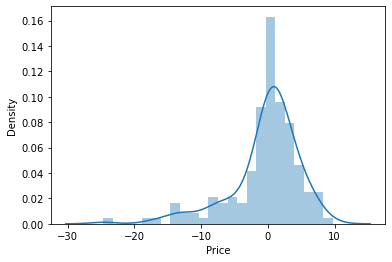

In [50]:
import seaborn as sns
sns.distplot(reg_pred-y_test)

# Assumptions of Linear Regression


Text(0, 0.5, 'Test predicted data')

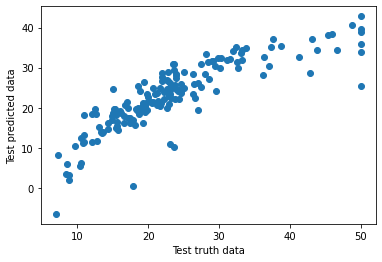

In [51]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

### Observation

Prediction is good

## Residuals

In [52]:

residual=y_test-reg_pred

In [53]:
residual

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: Price, Length: 167, dtype: float64

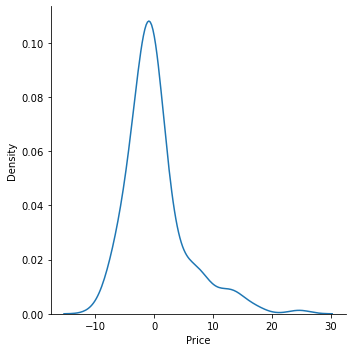

In [54]:
sns.displot(residual,kind='kde')

### Observation

The graph is normally distributed
But we are getting many outliers in right side

### Scatter plot with prediction and residual

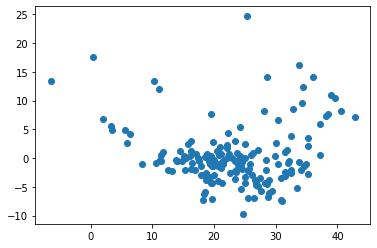

In [55]:


plt.scatter(reg_pred,residual)

### Observation  
The data ponts are uniformly distributed

# Performance Metrics


In [56]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.100991709962482
3.520658529879791
5.205861284164464


## R square and adjusted R square

In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7165219393967555


## Adjusted R square
### Display adjusted R square

In [58]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6924355682343882

# Ridge Regression Algorithm

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()

In [60]:
ridge_regressor

Ridge()

In [61]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

#### Best parameters 

In [62]:
print(ridgecv.best_params_)

{'alpha': 5}


#### Best mean scored error 

In [63]:
print(ridgecv.best_score_)

-23.049531955884163


In [64]:
ridge_pred=ridgecv.predict(x_test)

In [65]:
ridge_pred

array([30.94893945, 31.95230552, 30.83799576, 22.92515291, 19.06064421,
       16.23530635, 35.88249364, 14.95641351, 24.87647045, 36.93516109,
       21.49803619, 30.77541167, 27.74128325, 33.71782021, 33.61550173,
       40.5256606 , 24.39052554, 23.08079973, 25.4775641 , 21.72623058,
       32.56414106, 17.89589523, 25.5072399 , 25.04583898, 32.731564  ,
       20.48310157, 19.62667757, 16.99278046, 38.2589971 ,  0.26121174,
       32.49320583, 31.92195512, 26.2493227 , 23.88495547, 20.53407925,
       19.79600079,  3.77053503, 34.85557017, 26.91615746, 27.5962946 ,
       34.29501115, 29.56336019, 18.35920959, 31.48627405, 17.96762164,
       28.54935954, 19.5050633 , 21.50771653, 37.82319439, 16.59555187,
       24.48011234, 19.59543258, 24.32161035, 34.41441111, 26.73254221,
       34.68317698, 21.15136538, 19.89830841, 18.5570366 , 24.69580624,
       20.12960233, 23.65864042, 39.69027457, 42.68897335, 30.2869122 ,
       17.19710701, 23.87053511,  3.20992972, 31.14003141, 29.15

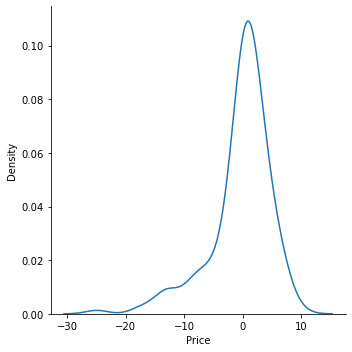

In [66]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

### Assumptions of linear Regression 

Text(0, 0.5, 'Test predicted data')

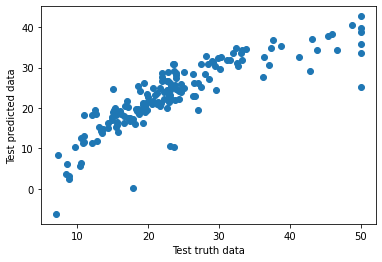

In [67]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

### Residual 

In [68]:
residual=y_test-ridge_pred

In [69]:
residual

305   -2.548939
193   -0.852306
65    -7.337996
349    3.674847
151    0.539356
         ...   
442   -0.959372
451   -4.408138
188   -2.575364
76    -2.695027
314   -1.872378
Name: Price, Length: 167, dtype: float64

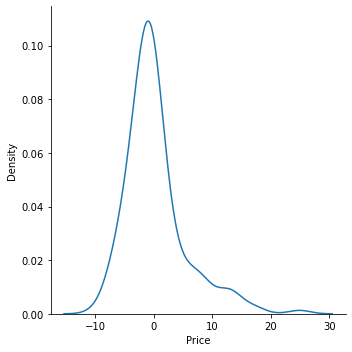

In [70]:
sns.displot(residual,kind='kde')

### Scatter plot with residual and prediction 

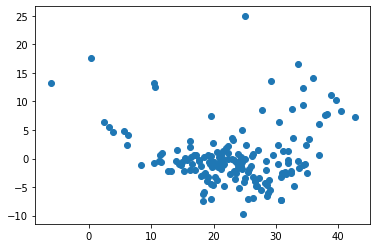

In [71]:
plt.scatter(ridge_pred,residual)

## Performance Metrics 

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

27.017970344577282
3.5019597897900274
5.19788133229081


### Rsquare 

In [73]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(score)

0.7165219393967555


### Adjusted Rsquare 

In [74]:
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6933777632412124

# Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

In [76]:
lasso=Lasso()

In [77]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [78]:
# print(lassocv.best_params_)
print(lassocv.best_score_)

-28.530703820491926


In [79]:
lasso_pred=lassocv.predict(x_test)

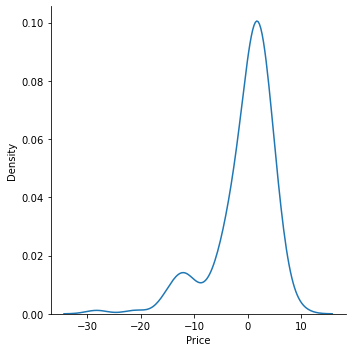

In [80]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

# Elastic-net Regression 

In [81]:
from sklearn.linear_model import ElasticNet

In [82]:
elastic_net_reg=ElasticNet()
elastic_net_reg

ElasticNet()

In [83]:
## Passing independent and dependent training dataset to the model
elastic_net_reg.fit(x_train,y_train)

ElasticNet()

In [84]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
elastic_netcv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_netcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [85]:
# print(elastic_netcv.best_params_)
print(elastic_netcv.best_score_)

-28.530703820491926


In [86]:
elastic_net_pred=elastic_netcv.predict(x_test)

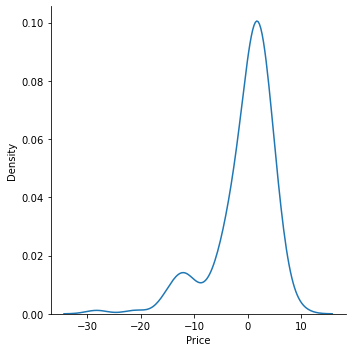

In [87]:
import seaborn as sns
sns.displot(elastic_net_pred-y_test,kind='kde')

## Assumption of Linear Regression 

Text(0, 0.5, 'Test predicted data')

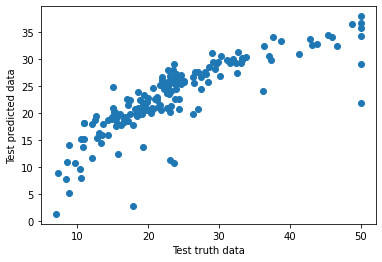

In [88]:
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

### Residual 

In [89]:
residual=y_test-elastic_net_pred

In [90]:
residual

305    2.758056
193    1.285747
65    -4.443243
349   -0.952565
151   -1.396403
         ...   
442   -0.975254
451   -4.919391
188    0.438910
76    -2.660821
314   -1.504938
Name: Price, Length: 167, dtype: float64

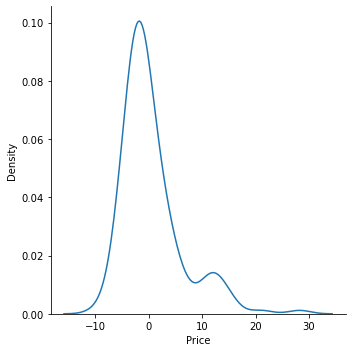

In [91]:
sns.displot(residual,kind='kde')

### Scatter plot with residual and prediction 

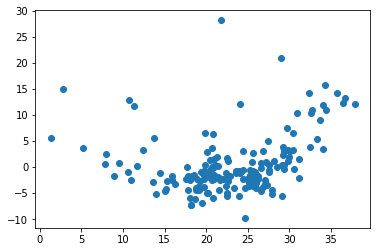

In [92]:
plt.scatter(elastic_net_pred,residual)

### Performance Metrics 

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

32.16822537607397
3.9064325476573205
5.671703921757021


### Rsquare 

In [94]:
from sklearn.metrics import r2_score
elastic_net_score=r2_score(y_test,elastic_net_pred)
print(score)

0.7165219393967555


### Adjusted Rsquare 

In [95]:
1-(1-elastic_net_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6349284164732871

# Thank You!! 